# Subselecting Data

You can select parts of your data based on channels, spatial coordinates, cell type labels, and neighborhoods.

If you want to follow along with this tutorial, you can download the data [here](https://oc.embl.de/index.php/s/XzEa9po1tjiDzzJ).

In [1]:
%reload_ext autoreload
%autoreload 2

import spatialproteomics
import pandas as pd
import xarray as xr

One of the key features of `spatialproteomics` is the ability to slice our image data quickly and intuitively. We start by loading our _spatialproteomics_ object.

In [2]:
ds = xr.open_zarr("../../data/LN_24_1.zarr")

## Slicing Channels and Spatial Coordinates

To slice specific channels of the image we simply use `.pp` accessor together with the familiar bracket `[]` indexing.

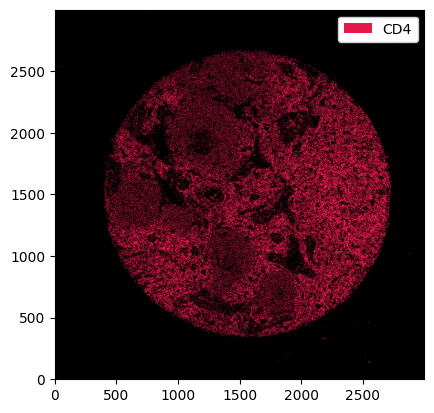

In [4]:
_ = ds.pp["CD4"].pl.show()

We can also select multiple channels by simply passing a list to the `.pp` accessor. As we will see later, this makes visualising image overlays easy.

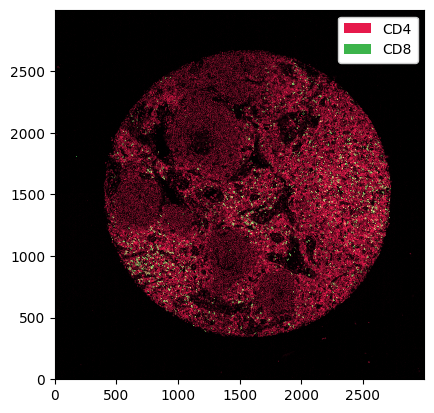

In [5]:
_ = ds.pp[["CD4", "CD8"]].pl.show()

The `.pp` accessor also understands `x` and `y` coordinates. When `x` and `y` coordinates are sliced, we get rid of all cells that do not belong to the respective image slice.

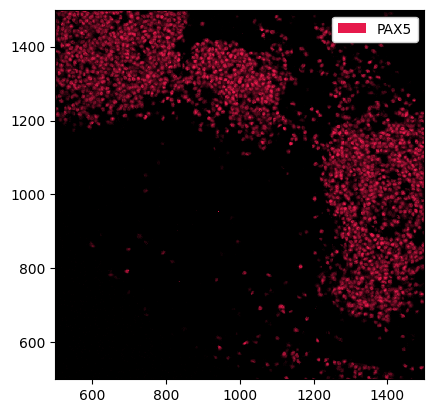

In [9]:
_ = ds.pp[500:1500, 500:1500].pp["PAX5"].pl.show()

Note that we can also pass `channels` and `x, y` coordinates at the same time.

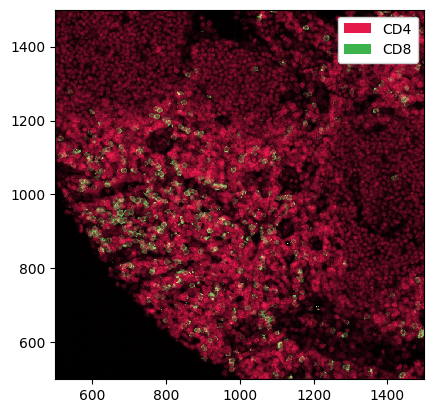

In [12]:
_ = ds.pp[["CD4", "CD8"], 500:1500, 500:1500].pl.show()

## Slicing Labels

The labels accessor `.la` allows to select specific cell types by their label number or name.

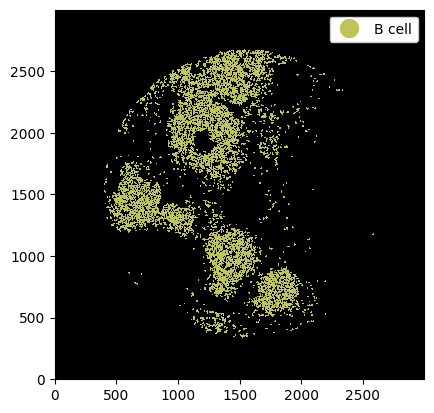

In [15]:
_ = ds.la[1].pl.show(render_image=False, render_labels=True)

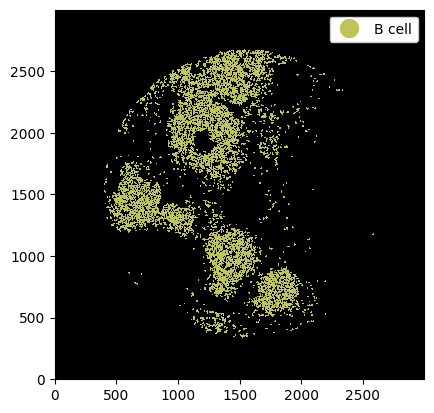

In [14]:
_ = ds.la["B cell"].pl.show(render_image=False, render_labels=True)

Again it is possible to pass multiple cell labels.

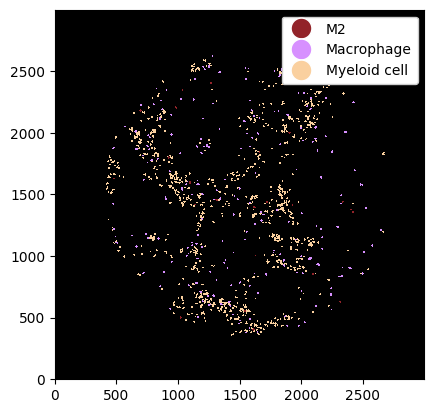

In [17]:
_ = ds.la[4, 5, 6].pl.show(render_image=False, render_labels=True)

Finally, we can select all cells except a cell type using `la.deselect`.

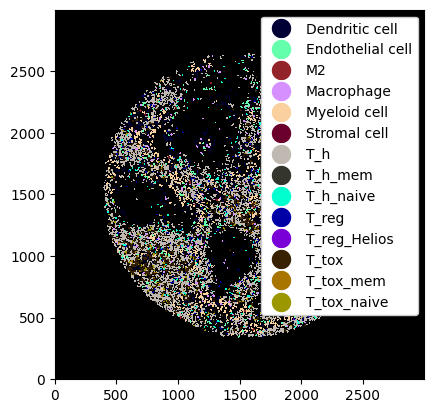

In [18]:
_ = ds.la.deselect(["B cell"]).pl.show(render_image=False, render_labels=True)

## Slicing Neighborhoods
We can also select by neighborhoods with the `nh` accessor. The syntax is identical to the one in the label subsetting.

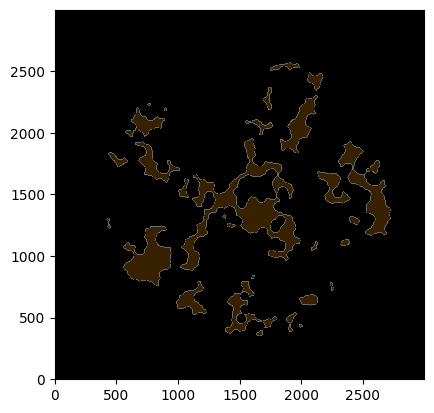

In [20]:
# subsetting only neighborhood 0
_ = ds.nh[1].pl.render_neighborhoods().pl.imshow()